<a href="https://colab.research.google.com/github/Sedhuraman99/customer_segmentation_using_nlp/blob/main/Customer_segmentation_using_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *customer segmentation using description column*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

viewing the dataset

In [2]:
df = pd.read_csv('/content/data.csv',encoding='cp1252')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


information about the dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


dropping unnecessary columns 

In [5]:
df = df.drop(['StockCode','InvoiceNo'],axis=1)

In [6]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
df.head()

,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


findingout null values

In [8]:
df.isnull().sum()

Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df.Description.nunique()

4223

dropping nan values and duplicates in description column

In [10]:
df = df.dropna(subset = ['Description'] )

In [11]:
df = df.drop_duplicates(subset = 'Description')

searching any blank spaces in description

In [12]:
df['Description'].str.isspace().sum()

0

removing punctuation for nlp

In [13]:
df['Dscrptn'] = df['Description'].str.replace("[^a-zA-Z0-9]", " ")

<ipython-input-13-69b928c4cbae>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Dscrptn'] = df['Description'].str.replace("[^a-zA-Z0-9]", " ")


In [ ]:
#df = df.drop(['Description'],axis=1)

removing unnecessary stopwords 

In [14]:
df['Dscrptn'] = df['Dscrptn'].apply(lambda x: ' '.join([word for word in x.split() if len(word)>2]))

changing all words into lowercases

In [15]:
df['Dscrptn'] = [product.lower() for product in df['Dscrptn']]

In [16]:
df['Dscrptn'].head(5)

0       white hanging heart light holder
1                    white metal lantern
2         cream cupid hearts coat hanger
3    knitted union flag hot water bottle
4          red woolly hottie white heart
Name: Dscrptn, dtype: object

In [17]:
df.shape

(4223, 7)

importing nlp packages

In [18]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

removing stopwords in description column

In [19]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
  
stop_words = stopwords.words('english')

add_words = ['pink','purple','white','blue','large','small','black','silver','metal','love','heart','christmas','set','red','green','vintage','design']

stop_words.extend(add_words)
  
def remove_stopwords(sw):    
    words_tokenized = word_tokenize(sw)
    des_new = " ".join([word for word in words_tokenized  if word not in stop_words])
    return des_new

df['Dscrptn'] = [remove_stopwords(r) for r in df['Dscrptn']]

lemmatization of words in description

In [20]:
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

def lemmatize_sentence(sentence):
  nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
  wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
  lemmatized_sentence = []
  for word, tag in wordnet_tagged:
    if tag is None:
      lemmatized_sentence.append(word) 
    else:
      lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
  return " ".join(lemmatized_sentence)     

df['Dscrptn'] = df['Dscrptn'].apply(lambda x: lemmatize_sentence(x))      

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


visualization

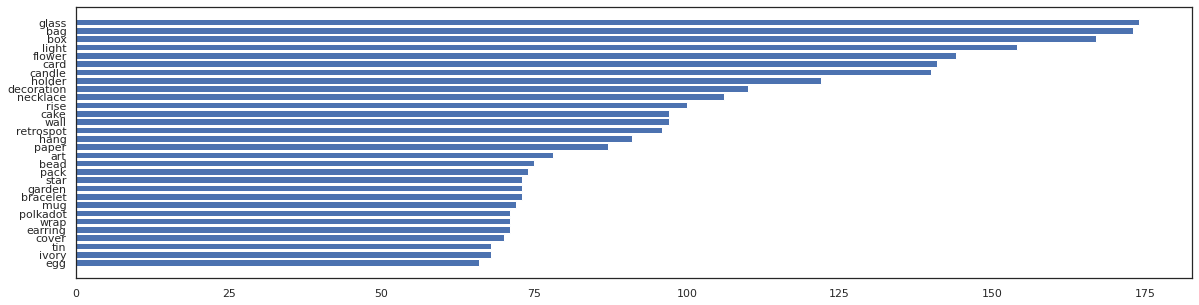

In [21]:
sns.set(style = 'white')
from nltk import FreqDist   

all_words_df = df['Dscrptn']

all_words = ' '.join([text for text in all_words_df])
all_words = all_words.split()
words_df = FreqDist(all_words)

words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df

words_df = words_df.nlargest(columns="count", n = 30) 

words_df.sort_values('count', inplace = True)

plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

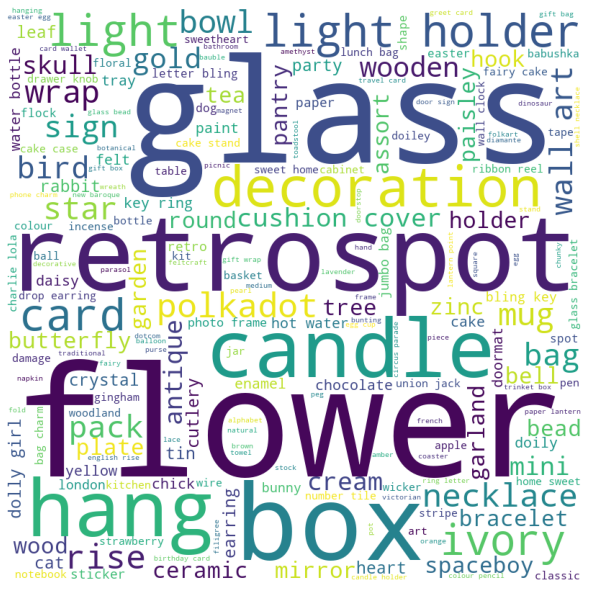

In [22]:
from wordcloud import WordCloud
word_cloud_df = df['Dscrptn']
all_words = ' '.join([text for text in word_cloud_df])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

vectorization

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [24]:
dscrptn_tfidf = tfidf.fit_transform(df.Dscrptn)

In [25]:
words = tfidf.get_feature_names_out()

In [26]:
dscrptn_tfidf

<4223x1939 sparse matrix of type '<class 'numpy.float64'>'
	with 13959 stored elements in Compressed Sparse Row format>

building kmeans model for clusters in description

In [27]:
from sklearn.cluster import KMeans

In [28]:
ssd = []

for k in range(2,20):
    
    model = KMeans(n_clusters=k)
    
    model.fit(dscrptn_tfidf)
    
    ssd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

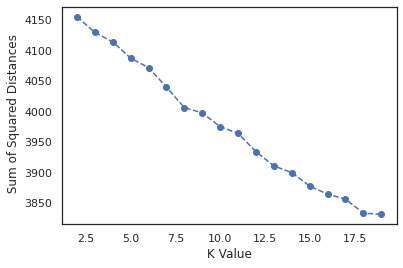

In [29]:
plt.plot(range(2,20),ssd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [30]:
pd.Series(ssd).diff()

0           NaN
1    -25.539395
2    -15.621218
3    -26.490537
4    -15.607586
5    -31.735928
6    -33.639696
7     -8.596087
8    -22.494166
9    -11.097793
10   -29.844038
11   -23.262362
12   -10.966299
13   -22.096596
14   -13.217151
15    -7.993715
16   -22.960569
17    -2.135492
dtype: float64

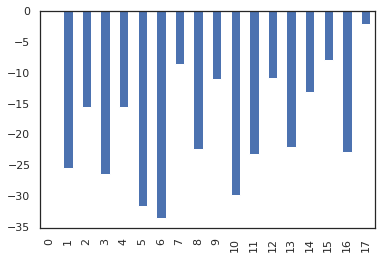

In [31]:
pd.Series(ssd).diff().plot(kind='bar')

fitting the best k value

In [32]:
model = KMeans(n_clusters=7, init = 'k-means++', max_iter = 300, n_init = 10)
model.fit(dscrptn_tfidf)

KMeans(n_clusters=7)

In [33]:
model.labels_

array([5, 2, 2, ..., 2, 5, 2], dtype=int32)

In [34]:
common_words = model.cluster_centers_.argsort()[:,-1:-11:-1]
for num, centroid in enumerate(common_words):
    print(str(num) + ' : ' + ', '.join(words[word] for word in centroid))

0 : candle, retrospot, polkadot, rise, garden, sign, cover, cushion, tile, key
1 : flower, wall, art, clock, mirror, artificial, enamel, tidy, felt, big
2 : glass, card, decoration, necklace, bracelet, paper, earring, wrap, crystal, bead
3 : box, trinket, tissue, money, gift, candle, lunch, morris, retrospot, pack
4 : cake, fairy, case, stand, tier, tin, ceramic, hang, pack, spot
5 : light, holder, hang, glass, star, bird, zinc, candle, card, night
6 : bag, jumbo, lunch, gift, charm, charlotte, paisley, retrospot, party, cosmetic


In [35]:
df['dscrptn Clusters'] = model.labels_

In [36]:
df['dscrptn Clusters'].nunique()

7

In [37]:
df['dscrptn Clusters'].value_counts()

2    2848
0     544
1     232
6     173
5     169
3     164
4      93
Name: dscrptn Clusters, dtype: int64

In [39]:
df['CustomerID'].shape

(4223,)

In [40]:
df = df.drop(['Dscrptn','InvoiceDate','UnitPrice'],axis=1)

In [41]:
df = df.dropna(subset = ['CustomerID'])

In [42]:
df['CustomerID'].shape

(2888,)

In [43]:
df

,Description,Quantity,CustomerID,Country,dscrptn Clusters
0,WHITE HANGING HEART T-LIGHT HOLDER,6,17850.0,United Kingdom,5
1,WHITE METAL LANTERN,6,17850.0,United Kingdom,2
2,CREAM CUPID HEARTS COAT HANGER,8,17850.0,United Kingdom,2
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,17850.0,United Kingdom,2
4,RED WOOLLY HOTTIE WHITE HEART.,6,17850.0,United Kingdom,2
...,...,...,...,...,...
503602,SET OF 6 RIBBONS PERFECTLY PRETTY,3,15443.0,United Kingdom,2
504104,SET OF 6 RIBBONS PARTY,1,17288.0,United Kingdom,2
527065,"LETTER ""U"" BLING KEY RING",12,13790.0,United Kingdom,0
537621,CREAM HANGING HEART T-LIGHT HOLDER,4,17841.0,United Kingdom,5


In [44]:
df = df.drop(['Description','Quantity','Country'],axis=1)

In [45]:
df['CustomerID'] = df['CustomerID'].astype(int)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(df)

In [ ]:
sd = []

for k in range(2,20):
    
    model = KMeans(n_clusters=k)
    
    model.fit(x)
    
    sd.append(model.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

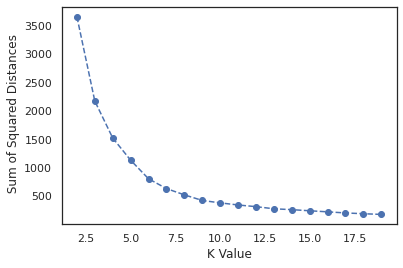

In [ ]:
plt.plot(range(2,20),sd,'o--')
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

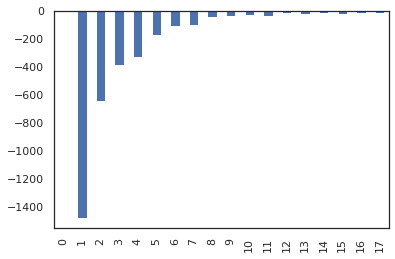

In [ ]:
pd.Series(sd).diff().plot(kind='bar')

In [ ]:
pd.Series(sd).diff()

0             NaN
1    -1483.686028
2     -648.764985
3     -390.055295
4     -327.021640
5     -172.354616
6     -110.001738
7      -98.676865
8      -42.388961
9      -37.166442
10     -29.375272
11     -37.475485
12     -15.600651
13     -19.408971
14     -18.772442
15     -19.412695
16     -13.833083
17     -12.138713
dtype: float64

In [ ]:
model = KMeans(n_clusters=8)

In [ ]:
model.fit(x)

KMeans()

In [ ]:
y = model.predict(x)

In [ ]:
print(y)

[5 3 3 ... 6 5 0]


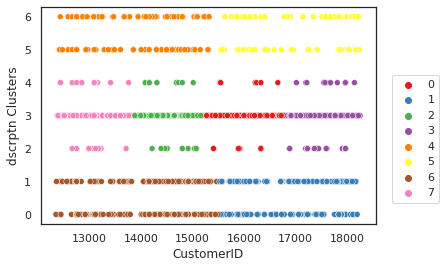

In [ ]:
sns.scatterplot(data=df,x='CustomerID',y='dscrptn Clusters',hue=y,palette='Set1');
plt.legend(loc=(1.05,0.1));

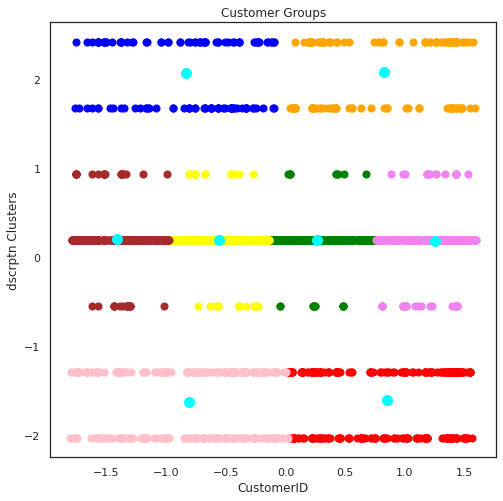

In [ ]:
plt.figure(figsize=(8,8))
plt.scatter(x[y==0,0], x[y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(x[y==1,0], x[y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(x[y==2,0], x[y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter(x[y==3,0], x[y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(x[y==4,0], x[y==4,1], s=50, c='blue', label='Cluster 5')
plt.scatter(x[y==5,0], x[y==5,1], s=50, c='orange', label='Cluster 3')
plt.scatter(x[y==6,0], x[y==6,1], s=50, c='pink', label='Cluster 4')
plt.scatter(x[y==7,0], x[y==7,1], s=50, c='brown', label='Cluster 5')

plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('CustomerID')
plt.ylabel('dscrptn Clusters')
plt.show()

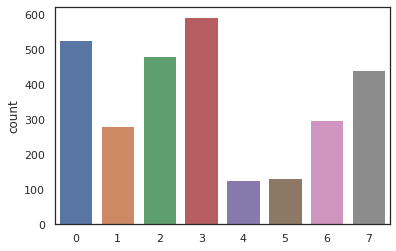

In [ ]:
sns.countplot(x=y)

predicting with random customerid with random discription cluster

In [ ]:
product = np.array([[17850,6]])
product

array([[17850,     6]])

In [ ]:
product = scaler.fit_transform(product)

In [ ]:
model = KMeans(n_clusters=8, init = 'k-means++', max_iter = 300, n_init = 10)

In [ ]:
model = model.fit(x)

In [ ]:
model.predict(product)

array([2], dtype=int32)